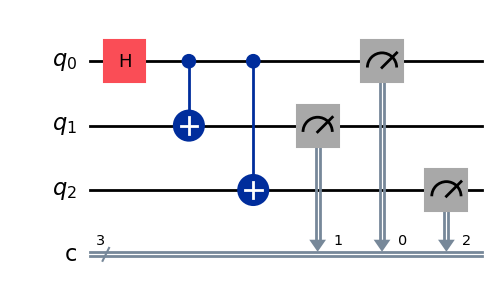

In [24]:
from qiskit.circuit.library import HGate
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2 as FA2
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qreg_q, creg_c)

qc.h(qreg_q[0])
qc.cx(qreg_q[0], qreg_q[1])
qc.cx(qreg_q[0], qreg_q[2])

qc.measure(qreg_q[1], creg_c[1])
qc.measure(qreg_q[0], creg_c[0])
qc.measure(qreg_q[2], creg_c[2])

qc.draw("mpl")

['111', '010', '000', '111', '110', '111', '110', '111', '111', '000', '111', '000', '000', '111', '111', '111', '111', '111', '000', '000', '000', '111', '000', '101', '111', '111', '110', '000', '000', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '110', '111', '111', '111', '011', '000', '111', '000', '000', '111', '111', '000', '111', '000', '111', '111', '000', '000', '000', '000', '100', '111', '111', '000', '000', '000', '111', '000', '111', '000', '000', '010', '000', '111', '000', '111', '111', '111', '000', '000', '000', '111', '111', '010', '111', '000', '000', '111', '111', '000', '000', '111', '111', '111', '111', '000', '111', '000', '000', '111', '111']


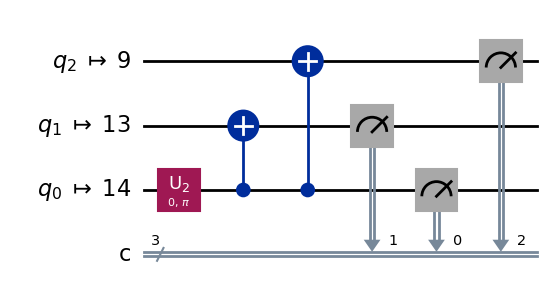

In [25]:
backend = FA2()
 
# Convert to an ISA qc
pm = generate_preset_pass_manager(backend=backend, optimization_level = 3)
iqc = pm.run(qc)


# Anfrage schicken
job = backend.run(iqc, shots = 100, memory = True)

result = job.result()
memory = result.get_memory()
print(memory)
iqc.draw("mpl")